# Operações vetoriais

Muitas das operações matemáticas que desejamos fazer com nossos dados são melhores servidas por operações vetoriais. Esse método de processamento torna muito conveniente o uso de dados em série ou formato tabular, representações comuns para dados numéricos, além de serem computacionalmente mais rápidas que processamento iterativo (utilizando `for`).

O primeiro passo para utilizar operações vetoriais é a utilização da biblioteca Numpy. É comum importar essa biblioteca utilizando um _alias_ ou apelido, geralmente `np`, para facilitar digitar. Para visualizarmos algumas operações em gráficos, também utilizaremos a biblioteca Matplotlib; similarmente, é convencional apelidar a importação dessa biblioteca como `plt`. Finalmente, adicionaremos uma diretiva inline para que os gráficos sejam mostrados dentro do próprio Jupyter.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Em vez de utilizarmos listas, colocaremos nossos dados no formato `ndarray` do Numpy. O funcionamento é parecido com listas, incluindo as operações de indexação. A principal diferença é que `ndarray`s possuem um tamanho fixo, enquanto listas são modificáveis (é possível adicionar e remover itens); e também que os `ndarray`s podem ser multidimensionais (a primeira dimensão é um vetor/lista, a segunda é uma matrix/tabela, e assim por diante).

A forma mais básica de criar um `ndarray` é converter a partir de uma lista.

In [ ]:
arr1 = np.array([1, 2, 3, 4, 5])
arr1

Outras formas comuns de criar arrays incluem:

- pontos equidistantes em um intervalo, pela função `linspace`
- um vetor somente com zeros, pela função `zeros`
- a matriz identidade, pela função `identity`
- um vetor com valores aleatórios, pela função `rand`

In [ ]:
# nove pontos equidistantes, começando em 1 e terminando em 5
np.linspace(1, 5, 9)

In [ ]:
# uma matriz 3x3 somente com zeros
# é necessário usar dois parêntesis porque só há um argumento, que é uma tupla
np.zeros((3, 3))

In [ ]:
# a matriz identidade de dimensão 5
np.identity(5)

In [ ]:
# uma matriz 5x3 de valores aleatórios uniformes entre 0 e 1
# cada vez que for executado gerará valores distintos
np.random.rand(5, 3)

## Aritmética de vetores

Os vetores do numpy tem propriedades interessantes em relação aos operadores aritméticos tradicionais.

Os operadores `+, -, *, /, **` entre um vetor e um número aplicam a operação a todos os elementos do vetor ("*broadcasting*").

In [3]:
a = np.array([1, 2, 3])

In [4]:
a + 1

array([2, 3, 4])

In [5]:
a - 0.5

array([0.5, 1.5, 2.5])

In [6]:
a * 2

array([2, 4, 6])

In [7]:
a / 2

array([0.5, 1. , 1.5])

In [8]:
a ** 2

array([1, 4, 9])

Quando esses operadores são usados entre dois vetores com o mesmo tamanho, a operação é aplicada entre os pares de elementos na mesma posição ("*element-wise*").

In [9]:
b = np.array([5, 6, 7])
a + b

array([ 6,  8, 10])

In [10]:
a * b

array([ 5, 12, 21])

### Operador @

O operador `@` pode ser utilizado entre dois vetores para fazer a operação de multiplicação matricial ou de produto interno. (Pode ser inicialmente confuso, mas uma multiplicação matricial é um _broadcasting_ de produtos internos).

In [11]:
m1 = np.array([[3, 5, -2],
               [6, 0, 1],
               [4, 1, 9]])
m2 = np.array([[5],
               [0],
               [1]])

m1 @ m2

array([[13],
       [31],
       [29]])

In [12]:
a @ b

38

In [13]:
# calculando produto interno "manualmente"
(a * b).sum()

38

In [14]:
np.array([3, 5, -2]) @ np.array([5, 0, 1])

13

## Indexação de vetores multidimensionais (matrizes)

A indexação de vetores multidimensionais funciona igual ao de vetores unidimensionais, mas utilizaremos tuplas como índice; no entanto não é necessário o uso de parêntesis, sua existência é implícita.

In [15]:
m = np.array([[5, 3, 1, 2],
              [-1, 2, 4, 1],
              [0, 3, 0, -3]])
m[0, 1]

3

Ainda é possível usar slicing.

In [16]:
m[:, 2]

array([1, 4, 0])

In [17]:
m[1, :3]

array([-1,  2,  4])

In [18]:
m[:2, 2:]

array([[1, 2],
       [4, 1]])

## Funções vetoriais

A biblioteca padrão do Python nos dá acesso a várias funções. Por exemplo, o pacote math tem a função seno. No entanto, essas funções recebem somente um número. A biblioteca Numpy também oferece muitas funções, muitas vezes repetindo com as que já existem, mas essas são formas vetoriais, que funcionam em todo o array.

In [19]:
a = np.array([1, 2, 3])
np.sin(a)

array([0.84147098, 0.90929743, 0.14112001])

Utilizando essas operações, podemos criar vetores derivados de outros. Usaremos isso para criar um gráfico da função seno.

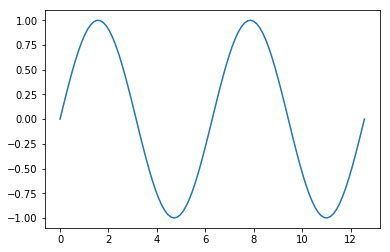

In [20]:
x = np.linspace(0, 4 * np.pi, 100)
y = np.sin(x)
plt.plot(x, y); # o ponto-e-vírgula é opcional, só serve pra esconder o output textual

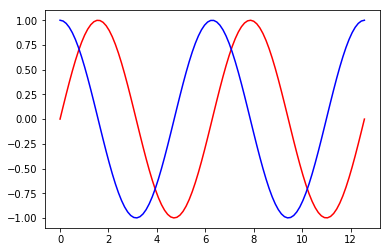

In [21]:
  # é possível criar mais de um plot na mesma célula
  y2 = np.cos(x)
  plt.plot(x, y, c='red') # criar a curva seno acima, em vermelho
  plt.plot(x, y2, c='blue'); # criar a curva cosseno, em azul

## Operações de redução

Muitas vezes estamos preocupados com operações de redução, que sumarizam o conjunto de dados que temos em mãos. Por exemplo, podemos calcular os valores mínimo e máximo, a média, etc.

In [22]:
# criar 15 números aleatórios
x = np.random.rand(15)
x

array([0.57261388, 0.68673817, 0.31270412, 0.99671233, 0.78718097,
       0.84938306, 0.11975398, 0.09464558, 0.74282003, 0.12167244,
       0.42508596, 0.70669449, 0.90509059, 0.98703665, 0.69843376])

In [23]:
# cálculo de quartis
print(x.min(), np.percentile(x, 25), np.percentile(x, 50), np.percentile(x, 75), x.max())

0.09464557546380847 0.3688950398416182 0.6984337640064493 0.8182820116197428 0.9967123287509364


In [ ]:
x.mean()

In [ ]:
x.sum()

In [ ]:
x.sum() / len(x)

## Iteração

Embora seja sempre preferível utilizar funções vetoriais, às vezes precisamos acessar todos os valores de um vetor manualmente. O comando `for` funciona para vetores assim como para listas. No caso de matrizes, cada elemento retornado no `for` é o vetor-linha.

A operação `for` é geralmente muito mais lenta que as operações vetoriais, e muitas vezes também é mais difícil de compreender o código.

In [ ]:
for elem in b:
  print(elem)

In [ ]:
for linha in m1:
  print(linha)
  for elem in linha:
    print(elem)

## Tipos de dados dentro de um vetor

Os vetores armazenam dados das mais diferentes formas, embora geralmente trabalhamos com números reais. Essa informação é guardada na variável `dtype` (de _data type_).

In [ ]:
b.dtype

In [ ]:
x.dtype

Nesses dois exemplos, o vetor `b = [5, 6, 7]` contém valores do tipo `int64`, um número inteiro de 64-bits. O vetor `x` que contém os 15 números aleatórios contém valores `float64`, números reais de 64-bits. Não há a necessidade de se preocupar com o fato de um número ser guardado como inteiro; qualquer operação que produza números reais faz com que o tipo seja convertido.

In [ ]:
print(b / 2)
print((b / 2).dtype)

É possível forçar o tipo de um vetor passando o parâmetro dtype quando o vetor é criado.

In [ ]:
c = np.array([5, 6, 7], dtype=np.float32)
c

Embora seja muito difícil encontrar aplicações disso, o numpy nos deixa guardar qualquer tipo de dados utilizando o dtype `object`. Esse tipo de dado será mais útil quando trabalharmos com a biblioteca pandas.

In [ ]:
np.array(['a', 'banana', 5, True], dtype=np.object)

Um outro tipo de dado muito utilizado é o valor booleano, que aceita somente os valores True e False. Também podemos tratar os valores True como o número 1 e os valores False como o número 0.

In [ ]:
d = np.array([True, True, False, True])
d

In [ ]:
d.dtype

In [ ]:
d.sum()

## Máscaras booleanas

Uma operação muito poderosa de numpy e pandas é a possibilidade de fazer a indexação de um vetor utilizando um outro vetor de mesmo tamanho, sendo esse segundo do tipo booleano. Essa operação é chamada de "máscara".

In [ ]:
v = np.array([5,    7,    1,     8,     4,    3,    8])
m = np.array([True, True, False, False, True, True, False])
v[m]

A principal vantagem disso é que podemos gerar máscaras booleanas utilizando o _broadcasting_ dos operadores de comparação.

In [ ]:
v > 5

In [ ]:
v[v > 5]

In [ ]:
v[v % 2 == 1]

In [ ]:
# selecionando 3 números aleatórios do vetor v
selecao = np.zeros(len(v), dtype=np.bool)
selecao[:3] = True
np.random.shuffle(selecao)
print(selecao)
v[selecao]